In [ ]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import time

# Section 1

In [ ]:
class unsupervised_clustering:
    """A class for generating unsupervised models for clustering
    Args:
        input_data(arr): a numpy array of random points
        n_clusters(int): number of clusters
    """
    def __init__(self, input_data, n_clusters):
        self.input_data = input_data
        self.n_clusters = n_clusters

    def kmeans_clustering(self):
        """Returns a kmeans clustering plot
        """
        # Start the timer
        start_time = time.perf_counter()
        # Fit the data to a kmean clustering model
        kmeans = KMeans(n_clusters=self.n_clusters)
        kmeans.fit(self.input_data)
        # Assign the clusters
        clusters = kmeans.predict(self.input_data)
        # Cluster centers
        centers = kmeans.cluster_centers_
        # End the timer
        end_time = time.perf_counter()
        # Calculate elapsed time
        runtime = end_time - start_time
        print("Runtime:", runtime, "seconds")
        # Plot the data points and cluster centers
        plt.scatter(self.input_data[:, 0], self.input_data[:, 1], c=clusters, cmap='cool')
        plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-means Clustering')
        plt.show()

    def agg_clustering(self):
        """Returns an agglomerative clustering plot
        """
        # Start the timer
        start_time = time.perf_counter()
        # Agglomerative Clustering with 3 clusters
        agg_cluster = AgglomerativeClustering(n_clusters=self.n_clusters)
        # Fit the model
        agg_cluster.fit(self.input_data)
        # Cluster labels
        labels = agg_cluster.labels_
        # End the timer
        end_time = time.perf_counter()
        # Calculate elapsed time
        runtime = end_time - start_time
        print("Runtime:", runtime, "seconds")
        # Plot the data points
        plt.scatter(self.input_data[:, 0], self.input_data[:, 1], c=labels, cmap='cool')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Agglomerative Clustering')
        plt.show()

## <font color=#FF0000> [Question 2] (8 marks)</font>

Use `np.random.randn(300,2)` to create 300 two-dimensional points. Using any two unsupervised learning technics which you have learnt in this course, cluster these points into three groups. (ie. you should have two separate sets of results.) Submit your code either as .py or .ipynb, showing the entire process of your solution. Also answer what you learnt from observing these results.

In [ ]:
# Random datapoints
X = np.random.randn(300, 2)

In [ ]:
# Instantiate the unsupervised_clustering class
plot_clusters = unsupervised_clustering(input_data=X, n_clusters=3)

C:\Users\kyyan\anaconda3\envs\ky_env_v1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Runtime: 0.07551719999173656 seconds


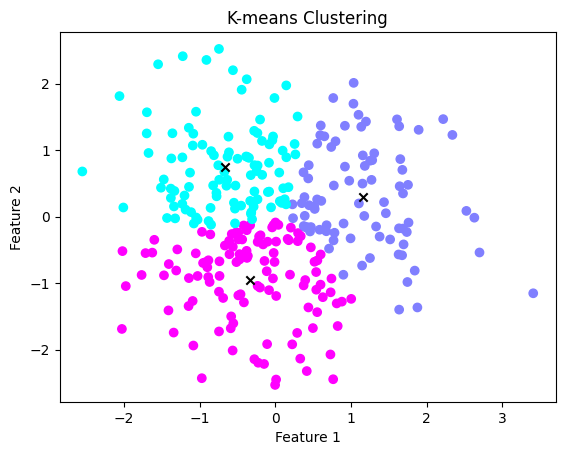

In [ ]:
# Kmeans clustering
plot_clusters.kmeans_clustering()

Runtime: 0.012097399972844869 seconds


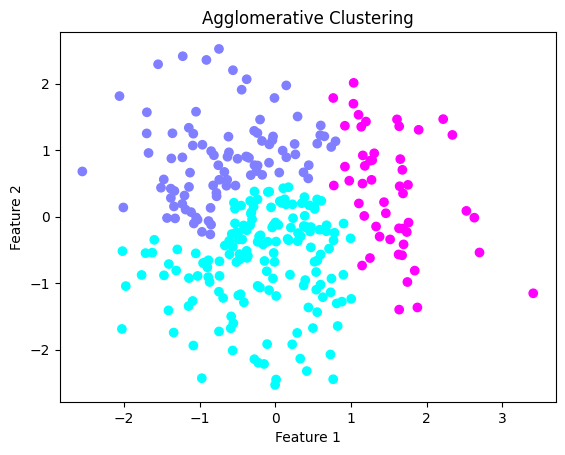

In [ ]:
# Agglomerative clustering
plot_clusters.agg_clustering()

### <font color=#FF0000> (Question) What you learnt from observing these results? </font>

#### <font color=0A66E0>Answer:</font>
Agglomerative clustering and k-means clustering, two unsupervised clustering methods, can produce different results when applied to the same dataset. Agglomerative clustering does not require predefining the number of clusters and determines it based on the hierarchical tree structure. In contrast, k-means clustering relies on a user-defined parameter, K, which represents the desired number of clusters. The boundaries in k-means clustering tend to be more linear compared to agglomerative clustering, pprimarily due to the nature of the optimization objective in k-means. By minimizing the sum of squared distances, k-means effectively tries to create compact clusters with data points close to their centroids. This bias towards compactness and equal variance leads to linear boundaries when the data distribution is not well-suited to spherical clusters. Agglomerative clustering, on the other hand, is not bound by such constraints and can generate flexible and non-linear boundaries, capturing complex relationships and irregular shapes in the data.

# Section 2

In [1]:
!pip install datasets==2.12.0
!pip install transformers==4.28.0
!pip install --upgrade accelerate
!pip install -q transformers datasets
#!pip install sklearn==1.2.2
!pip install torch==2.0.1
!pip install torchvision==0.15.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 27.6 MB/s eta 0:00

In [2]:
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from transformers import TrainingArguments, Trainer, ViTImageProcessor, ViTForImageClassification
from torch.utils.data import DataLoader
import torch
from torchvision.transforms import Normalize, ToTensor, Compose, transforms

In [3]:
class setupPipeline:
    """A pipeline for setting up the input images into the required format for training and inference
    Args:
          dataset_name(str): The name of the dataset to extract from the datasets library
          train_size(int): The size of the train dataset to extract from the datasets library
          test_size(int): The size of the test dataset to extract from the datasets library
          validation_split(float): A ratio for splitting the training data
          shuffle_data(bool): Wether to shuffle the data
          model_checkpoint(str): A pretrained model checkpoint from HuggingFace
          image_transformation(obj): An object specifying the type of image transformation required
    """
    def __init__(self, dataset_name, train_size, test_size, validation_split, shuffle_data, model_checkpoint):
        self.dataset_name = dataset_name
        self.train_size = train_size
        self.test_size = test_size
        self.validation_split = validation_split
        self.shuffle_data = shuffle_data
        self.model_checkpoint = model_checkpoint
        self.image_transformation = None

    def load_data(self):
        """Load the required dataset using the load_dataset method
        """
        train_ds, test_ds = load_dataset(self.dataset_name, split=['train[:' + str(self.train_size) + ']', 'test[:'+ str(self.test_size) + ']'])
        return train_ds, test_ds

    def image_transform(self, data):
        """Transform the input images to pixel values
        Args:
            Data(dataset): A dataset containing the images, labels, and pixel values
        Returns:
            An updated dataset with transformed pixel values
        """
        data['pixel_values'] = [self.image_transformation(image.convert("RGB")) for image in data['img']]
        return data

    def preprocess_data(self, train_ds, test_ds):
        """Preprocess the input images to the required format by applying various transformations
        Args:
            train_ds(dataset): A train dataset containing the images, labels, and pixel values
            test_ds(dataset): A test dataset containing the images, labels, and pixel values
        Returns:
            The train, validation, and test datasets with transformation applied; the id2label and label2id maps, and the model image processor
        """
        # Split the data into train and validation sets
        splits = train_ds.train_test_split(test_size=self.validation_split, shuffle=self.shuffle_data)
        train_ds = splits['train']
        val_ds = splits['test']
        # Map labels to ids and ids to labels
        id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
        label2id = {label:id for id,label in id2label.items()}
        # Define the image processor based on a checkpoint ViT model to process the images
        processor = ViTImageProcessor.from_pretrained(self.model_checkpoint)
        # Normalize, resize, and convert the images to tensor format
        image_mean, image_std = processor.image_mean, processor.image_std
        normalize = Normalize(mean=image_mean, std=image_std)
        # The pretrained model uses 224x224 images only; upscale the input images to this size
        self.image_transformation = Compose([ToTensor(), normalize, transforms.Resize((224, 224))])
        # Apply the transformation on the datasets
        train_ds.set_transform(self.image_transform)
        val_ds.set_transform(self.image_transform)
        test_ds.set_transform(self.image_transform)
        return train_ds, val_ds, test_ds, id2label, label2id, processor

class runPipeline(setupPipeline):
    """A pipeline for executing the training and inference steps
    Args:
          learning_rate (float): The initial learning rate for AdamW optimizer
          per_device_train_batch_size (int): The batch size per GPU/TPU core/CPU for training
          per_device_eval_batch_size (int): The batch size per GPU/TPU core/CPU for evaluation
          num_train_epochs (int): Number of epoch to train
          weight_decay (float): The weight decay to apply (if not zero) to all layers except all bias and LayerNorm weights
          eval_metric(str): A evaluation metric to be displayed when training
          pipeline_type(str): Specifying whether to use the pipeline for training or making prediction
          dataset_name(str): The name of the image dataset
          train_ds(dataset): A train dataset containing the images, labels, and pixel values
          val_ds(dataset): A validation dataset containing the images, labels, and pixel values
          test_ds(dataset): A test dataset containing the images, labels, and pixel values
          label2id(dict): A dictionary to map labels to ids
          id2label(dict): A dictionary to map ids to labels
          model_checkpoint(str): Specifying the model checkpoint based on the HuggingFace API
          processor(obj): A torchvision object for tokenizing the images
          torch_weights_filename(str): A pytorch file containing the fine-tuned weights of the model
          device (obj): Specifies whether to use cpu or gpu
    """
    def __init__(self, learning_rate, per_device_train_batch_size, per_device_eval_batch_size, num_train_epochs, weight_decay, eval_metric, pipeline_type, dataset_name, train_ds, val_ds, test_ds, label2id, id2label, model_checkpoint, processor, torch_weights_filename, device):
        self.learning_rate = learning_rate
        self.per_device_train_batch_size = per_device_train_batch_size
        self.per_device_eval_batch_size = per_device_eval_batch_size
        self.num_train_epochs = num_train_epochs
        self.weight_decay = weight_decay
        self.eval_metric = eval_metric
        self.pipeline_type = pipeline_type
        self.dataset_name = dataset_name
        self.train_ds = train_ds
        self.val_ds = val_ds
        self.test_ds = test_ds
        self.label2id = label2id
        self.id2label = id2label
        self.model_checkpoint = model_checkpoint
        self.processor = processor
        self.torch_weights_filename = torch_weights_filename
        self.device = device

    def collate_fn(self, data):
        """A custom collate function for the dataLoader
        Args:
            data(list): List of individual samples
        Returns:
            A dictionary containing the batched pixel values and labels
        """
        pixel_values = torch.stack([d["pixel_values"] for d in data])
        labels = torch.tensor([d["label"] for d in data])
        return {"pixel_values": pixel_values, "labels": labels}

    def compute_metrics(self, eval_pred):
        """Compute evaluation metrics based on the predicted and true labels
        Args:
            eval_pred (tuple): Tuple containing predicted labels and true labels.
        Returns:
            A dictionary containing the computed evaluation metrics
        """
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)
        return dict(accuracy=accuracy_score(predictions, labels))

    def execute_pipeline(self):
        """Execute the pipeline based on the specified pipeline type
        Returns:
            The Trainer object for training or prediction
        """
        # Load the ViT model for image classification
        model = ViTForImageClassification.from_pretrained(self.model_checkpoint, id2label=self.id2label, label2id=self.label2id)
        # Set the training arguments for the Trainer
        args = TrainingArguments(
            output_dir = self.dataset_name,
            save_strategy = "epoch",
            evaluation_strategy = "epoch",
            learning_rate = self.learning_rate,
            per_device_train_batch_size = self.per_device_train_batch_size,
            per_device_eval_batch_size = self.per_device_eval_batch_size,
            num_train_epochs = self.num_train_epochs,
            weight_decay = self.weight_decay,
            load_best_model_at_end = True,
            metric_for_best_model = self.eval_metric,
            logging_dir = 'logs',
            remove_unused_columns = False
        )
        # Check the pipeline type and create the Trainer accordingly
        if self.pipeline_type.lower() == "train":
            executor = Trainer(
                model=model,
                args=args,
                train_dataset=self.train_ds,
                eval_dataset=self.val_ds,
                data_collator=self.collate_fn,
                compute_metrics=self.compute_metrics,
                tokenizer=self.processor
            )
        if self.pipeline_type.lower() == "predict":
            # Load the pre-trained weights for prediction
            model.load_state_dict(torch.load("./" + self.torch_weights_filename, map_location=torch.device(self.device.type)))
            executor = Trainer(
                model=model,
                args=args,
                train_dataset=self.train_ds,
                eval_dataset=self.val_ds,
                data_collator=self.collate_fn,
                compute_metrics=self.compute_metrics,
                tokenizer=self.processor
            )
        return executor

    def visualize_results(self, preds):
        """Visualize the evaluation results
        Args:
            preds(obj): A transformer object containing prediction outputs
        Returns:
            None
        """
        # Print the evaluation metrics
        print(f"\n\n{preds.metrics} \n")
        # Get the true labels and predicted labels
        y_true = preds.label_ids
        y_pred = preds.predictions.argmax(1)
        # Get the label names
        labels = self.test_ds.features['label'].names
        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Create a ConfusionMatrixDisplay and plot the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(xticks_rotation=45)

In [4]:
# Initialize device to cpu/gpu
if torch.cuda.is_available():
    device = torch.device("cuda")
    n_gpu = torch.cuda.device_count()
    torch.cuda.get_device_name(0)
else:
    device = torch.device("cpu")

# Step 1: Compile and Preprocess Data

In [5]:
pipe1 = setupPipeline(
    dataset_name='cifar10',
    train_size=50000,
    test_size=10000,
    validation_split=0.1,
    shuffle_data=True,
    model_checkpoint="google/vit-base-patch16-224-in21k"
)

In [6]:
train_ds, test_ds = pipe1.load_data()

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:325: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
train_ds, val_ds, test_ds, id2label, label2id, processor = pipe1.preprocess_data(train_ds=train_ds, test_ds=test_ds)

### Note: Run the codes below when using Colab only.

In [11]:
#@title codes to mount your google drive folder
try:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/AML/
except:
    pass
# Change to the correct subfolder

Mounted at /content/drive
/content/drive/MyDrive/AML


# Step 2: Training (Optional)

### This step is optional. Proceed to step 3 to import the fine-tuned model weights and make inference on the Cifar10 test images.

In [ ]:
# Clear GPU RAM
#from numba import cuda
#device = cuda.get_current_device()
#device.reset()

In [ ]:
%%time
run1 = runPipeline(
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.001,
    eval_metric="accuracy",
    pipeline_type="train",
    dataset_name='cifar10',
    train_ds=train_ds,
    val_ds=val_ds,
    test_ds=test_ds,
    label2id=label2id,
    id2label=id2label,
    model_checkpoint="google/vit-base-patch16-224-in21k",
    processor=processor,
    torch_weights_filename=None,
    device=device
)
executor1 = run1.execute_pipeline()
executor1.train()
torch.save(executor1.model.state_dict(), 'AML_cifar10_model_weights_v3.pt')

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-p

Epoch,Training Loss,Validation Loss,Accuracy
1,0.199900,0.104991,0.983000
2,0.046800,0.076806,0.983800
3,0.016300,0.060585,0.985800
4,0.007200,0.052041,0.988600
5,0.005000,0.055046,0.988200


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

CPU times: user 2h 16min 41s, sys: 43.3 s, total: 2h 17min 24s
Wall time: 2h 18min 59s


# Step 3: Inference

### The model weights are loaded from the file: "AML_cifar10_model_weights_v3.pt"
### The fine-tuned model weights can be downloaded via the following URL: https://drive.google.com/file/d/1ZKZzoDYgBWFkK5CakdEnZtkm2MHyhg6N/view?usp=sharing

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-p



{'test_loss': 0.0725829005241394, 'test_accuracy': 0.985, 'test_runtime': 132.0807, 'test_samples_per_second': 75.711, 'test_steps_per_second': 2.37} 

CPU times: user 2min 6s, sys: 1.95 s, total: 2min 8s
Wall time: 2min 21s


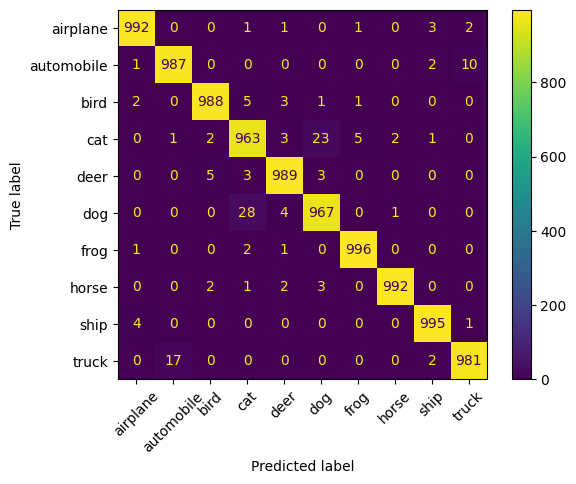

In [12]:
%%time
run2 = runPipeline(
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=1,
    weight_decay=0.01,
    eval_metric="accuracy",
    pipeline_type="predict",
    dataset_name='cifar10',
    train_ds=train_ds,
    val_ds=val_ds,
    test_ds=test_ds,
    label2id=label2id,
    id2label=id2label,
    model_checkpoint="google/vit-base-patch16-224-in21k",
    processor=processor,
    torch_weights_filename="AML_cifar10_model_weights_v3.pt",
    device=device
)
executor2 = run2.execute_pipeline()
preds = executor2.predict(test_ds)
run2.visualize_results(preds)